# Square Gradient Theory for Pure Components

This notebook has te purpose of showing examples of computing interfacial tension of pure fluids. This calculation is based on Square Gradient Theory, which for pure fluids allows computing the interfacial tension as follows:

$$ \sigma = \sqrt{2c_{ii}} \int_{\rho^v}^{\rho^l} \sqrt{a_0 - \rho \mu^0 + P^0} d\rho $$

Here, $\sigma$ represents the interfacial tension, $\rho^v$ and $\rho^l$ are the vapor and liquid molar densities, respectively, $P^0$ is the vapor pressure, $a_0$ is the Helmholtz energy density and $\mu^0$ is the equilibrium chemical potential. Both $a_0$ and $\mu^0$ are obtained from the EoS. Finally, $c_{ii}$ is the influence parameter.

SGT for pure fluids is implemented through the ``sgt_pure`` function. First, it's needed to import the necessary modules

In [1]:
import numpy as np
from SGTPy import component, saftvrmie
from SGTPy.sgt import sgt_pure

In [2]:
# The pure component is defined with the influence parameter
water = component('water', ms = 1.7311, sigma = 2.4539 , eps = 110.85,
                    lambda_r = 8.308, lambda_a = 6., eAB = 1991.07, rcAB = 0.5624,
                    rdAB = 0.4, sites = [0,2,2], cii = 1.5371939422641703e-20)
eos = saftvrmie(water)

Now vapor-liquid equilibria has to be computed. This is done with the ``psat`` method from the EoS, which returns the pressure and densities at equilibrium.

Alternatively, you can use the ``tsat`` method to compute equilibrium temperature and densities at given pressure.

In [3]:
T = 373. # K
P0 = 1e4 # Pa
P, vl, vv = eos.psat(T, P0=P0)
rhol = 1/vl # mol/m3
rhov = 1/vv # mol/m3

Once the phase equilibrium is computed, the interfacial tension can be computed as follow:

In [4]:
tension = sgt_pure(rhol, rhov, T, P, eos)
tension # mN/m

array([58.84475645])

If all the calculated information is desired, the ```full_output``` options allow obtaining, density profiles, interfacial tension and grand thermodynamic potential.

In [5]:
solution = sgt_pure(rhol, rhov, T, P, eos, full_output=True)

Text(0, 0.5, '$\\rho$ / m$^3$ mol$^{-1}$')

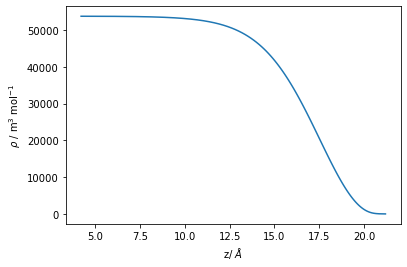

In [6]:
import matplotlib.pyplot as plt
z = solution.z
rho = solution.rho
plt.plot(z, rho)
plt.xlabel(r'z/ $\AA$')
plt.ylabel(r'$\rho$ / m$^3$ mol$^{-1}$')

The procedure can be repeated in a for loop, allowing to study the interfacial behavior against the temperature. The results can be compared against experimental data.

In [7]:
#Experimental Saturation Data of water obtained from NIST
#Saturation Temperature in Kelvin
Tsat = np.array([290., 300., 310., 320., 330., 340., 350., 360., 370., 380.]) 

#Interfacial Tension in mN/m
tension = np.array([73.21 , 71.686, 70.106, 68.47 , 66.781, 65.04 , 63.248, 61.406,
       59.517, 57.581]) 

ten_sgt = np.zeros_like(tension)
n = len(Tsat)

i = 0
P, vl, vv = eos.psat(Tsat[i], P0=1e4)
rhol = 1/vl
rhov = 1/vv
ten_sgt[i] = sgt_pure(rhol, rhov, Tsat[i], P, eos, full_output = False)

for i in range(1, n):
    P, vl, vv = eos.psat(Tsat[i], P0=P)
    rhol = 1/vl
    rhov = 1/vv
    ten_sgt[i] = sgt_pure(rhol, rhov, Tsat[i], P, eos, full_output = False)

Text(0, 0.5, 'IFT / mN/m')

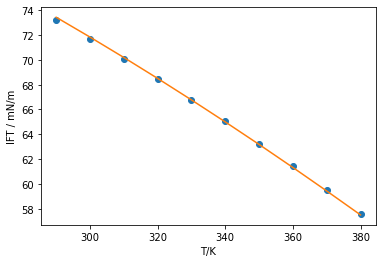

In [8]:
plt.plot(Tsat, tension, 'o')
plt.plot(Tsat, ten_sgt)
plt.xlabel('T/K')
plt.ylabel('IFT / mN/m')

---
For further information about the ``sgt_pure`` function check out the documentation running: ``sgt_pure?``